In [6]:
!pip install pandas_datareader
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [11]:
start = '2010-01-01'
end = '2023-01-01'

stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [13]:
data.reset_index(inplace=True)

In [14]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.571998,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.503423,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.112601,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.760787,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.957565,189680313
...,...,...,...,...,...,...,...
3267,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.589981,17815000
3268,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.714592,15470900
3269,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.248192,17879600
3270,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.732086,18280700


In [15]:
ma_100_days=data.Close.rolling(100).mean()

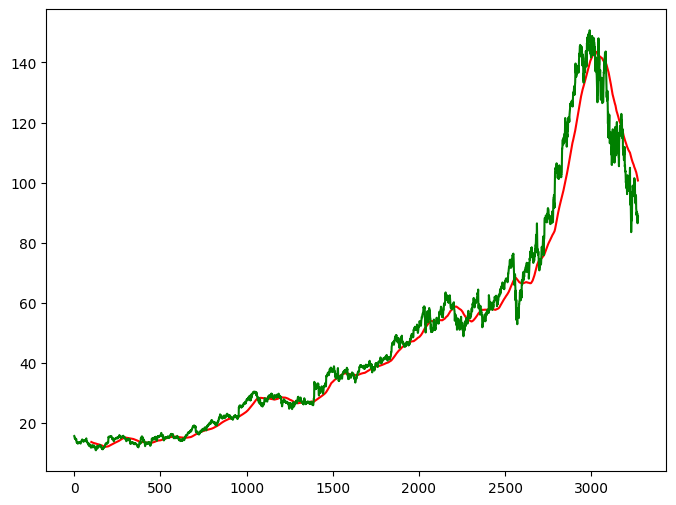

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [17]:
ma_200_days=data.Close.rolling(200).mean()

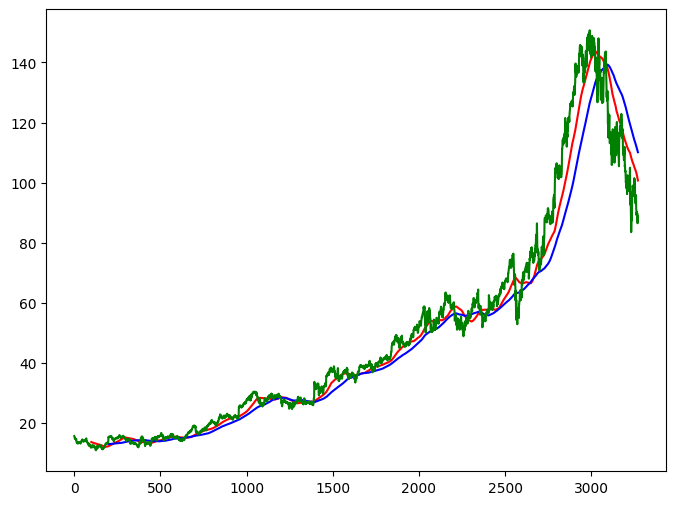

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

Data PreProcessing

In [26]:
data_train = pd.DataFrame(data.Close[0:int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80):len(data)])

In [29]:
data_train.shape[0]

2617

In [31]:
data_test.shape[0]

655

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [34]:
data_train_scale=scaler.fit_transform(data_train)

Trying on 100 days data to predict for 101 day data

In [35]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [42]:
x,y=np.array(x),np.array(y)

In [43]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [46]:
model= Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [47]:
model.compile(optimizer = 'adam' ,loss='mean_squared_error')

In [48]:
model.fit(x,y,epochs=50, batch_size=32,verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 290ms/step - loss: 0.0664
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - loss: 0.0065
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 0.0055
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0049
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0045
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0045
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0041
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0034
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0035
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0031
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0037
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0029
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0031
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0030
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.003

In [49]:
 model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [50]:
pas_100_days=data_train.tail(100)

In [51]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [56]:
data_test_scale= scaler.fit_transform(data_test)

In [58]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [59]:
y_predict=model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [65]:
scale=1/scaler.scale_

In [66]:
y_predict = y_predict*scale

In [67]:
y=y*scale

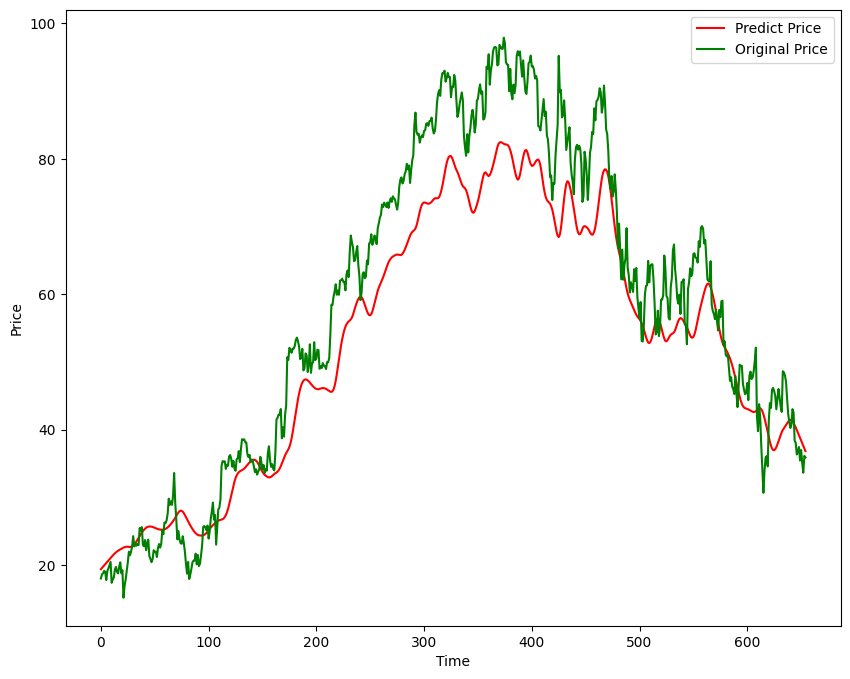

In [70]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predict Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [72]:
model.save('Stock Prediction Model.keras')